In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
import time #to have today's date
timestr = time.strftime("%Y%m%d")
from collections import Counter #to count appearances in list
import matplotlib
import matplotlib.pyplot as plt
var_text_size = 15 #for font size in graphs


In [7]:
#get the clean text from the other notebook
%run ./p_03_prepare_text_paper.ipynb

#doc_clean = get_doc_clean() ##all interviews together
#set_countries = get_set_countries() #get set of countries
#dict_country_doc_list_paras_n_clean #by country, with n-grams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


## for all countries in one cloud

matplotlib.use('SVG') #set the backend to SVG

In [8]:
long_list = []
for n in range(0,len(doc_clean)-1):
    long_list = long_list + doc_clean[n]

In [9]:
#this runs witho doc_clean, which has n-grams. but they don't show.
Counter(long_list).most_common()

[('coal', 5559),
 ('energy', 3685),
 ('government', 2924),
 ('work', 2757),
 ('year', 2652),
 ('policy', 2618),
 ('people', 2504),
 ('need', 2320),
 ('company', 2041),
 ('much', 2037),
 ('right', 2006),
 ('time', 1992),
 ('country', 1928),
 ('project', 1913),
 ('take', 1800),
 ('power', 1709),
 ('way', 1610),
 ('still', 1577),
 ('talk', 1551),
 ('example', 1537),
 ('electricity', 1519),
 ('important', 1518),
 ('sector', 1440),
 ('happen', 1424),
 ('term', 1416),
 ('plan', 1412),
 ('question', 1368),
 ('use', 1343),
 ('different', 1339),
 ('give', 1330),
 ('change', 1296),
 ('renewable_energy', 1276),
 ('state', 1264),
 ('new', 1259),
 ('many', 1256),
 ('development', 1249),
 ('cost', 1244),
 ('start', 1239),
 ('part', 1217),
 ('industry', 1209),
 ('process', 1202),
 ('big', 1193),
 ('good', 1176),
 ('price', 1160),
 ('first', 1153),
 ('political', 1092),
 ('problem', 1074),
 ('market', 1070),
 ('mine', 1059),
 ('role', 1059),
 ('level', 1056),
 ('renewables', 1035),
 ('try', 1029),
 ('

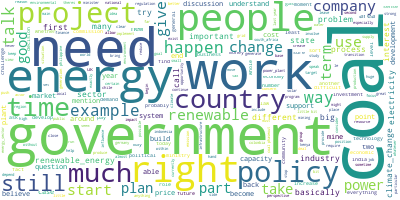

In [16]:
#do wordcloud for all countries together

# Create a WordCloud object
# Join the different processed titles together.
long_string = ','.join(long_list)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

#save as png
wordcloud.to_file('.//results//wordclouds//wordclouds_all_'+timestr+'.png')

#save as svg
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off")
fig = plt.gcf() #get current figure
fig.set_size_inches(10,10)  
plt.savefig('.//results//wordclouds//wordclouds_all_'+timestr+'.svg')

# Visualize the word cloud
wordcloud.to_image()

## each country seperate cloud

In [11]:
#create the word clouds
dict_wordcloud = {}
for y in dict_country_doc_list_paras_n_clean:
    long_list = []
    for n in range(0,len(dict_country_doc_list_paras_n_clean[y])-1):
        long_list = long_list + dict_country_doc_list_paras_n_clean[y][n]# Create a WordCloud object
    # Join the different processed titles together.
    long_string = ','.join(long_list)

    dict_wordcloud[y] = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    dict_wordcloud[y].generate(long_string)
    #print('for '+y+' :')
    # Visualize the word cloud
    dict_wordcloud[y].to_image()
    #save wordcloud as png
    dict_wordcloud[y].to_file('.//results//wordclouds//n_grams_wordclouds_'+y+'_'+timestr+'.png')
    
    #save as svg
    plt.imshow(dict_wordcloud[y], interpolation="bilinear") 
    plt.axis("off")
    fig = plt.gcf() #get current figure
    fig.set_size_inches(10,10)  
    plt.savefig('.//results//wordclouds//n_grams_wordclouds_'+y+'_'+timestr+'.svg')

# TO-DO:

In [58]:
list_countries = list(dict_country_doc_list_paras_n_clean.keys())

In [59]:
list_countries

['DE', 'UK', 'CL', 'CO', 'US', 'KE', 'ZA', 'ID', 'IN', 'VN', 'PH', 'PK']

In [104]:
# show x most frequent words per country etc.
#horizontal bar graphs
#do 3x4 graphs
var_keep = 15 #for top x words

In [60]:
def get_list_with_all_words(country):
    #create list with all words
    list_country = []
    for x in dict_country_doc_list_paras_n_clean[country]:
        list_country.extend(x)
    var_num_words = len(list_country)
    return(list_country, var_num_words)

In [62]:
def get_df_wordcount(list_country):
#count the word and put into dataframe
    list_country_counter =  Counter(list_country).most_common()
    df_country = pd.DataFrame(list_country_counter, columns={'word', 'count'})
    df_country['share'] = df_country['count']*100/var_num_words
    df_country_short = df_country.head(var_keep)
    df_country_short_r = df_country_short.iloc[::-1].reset_index(drop=True) #reverse
    return(df_country_short_r)

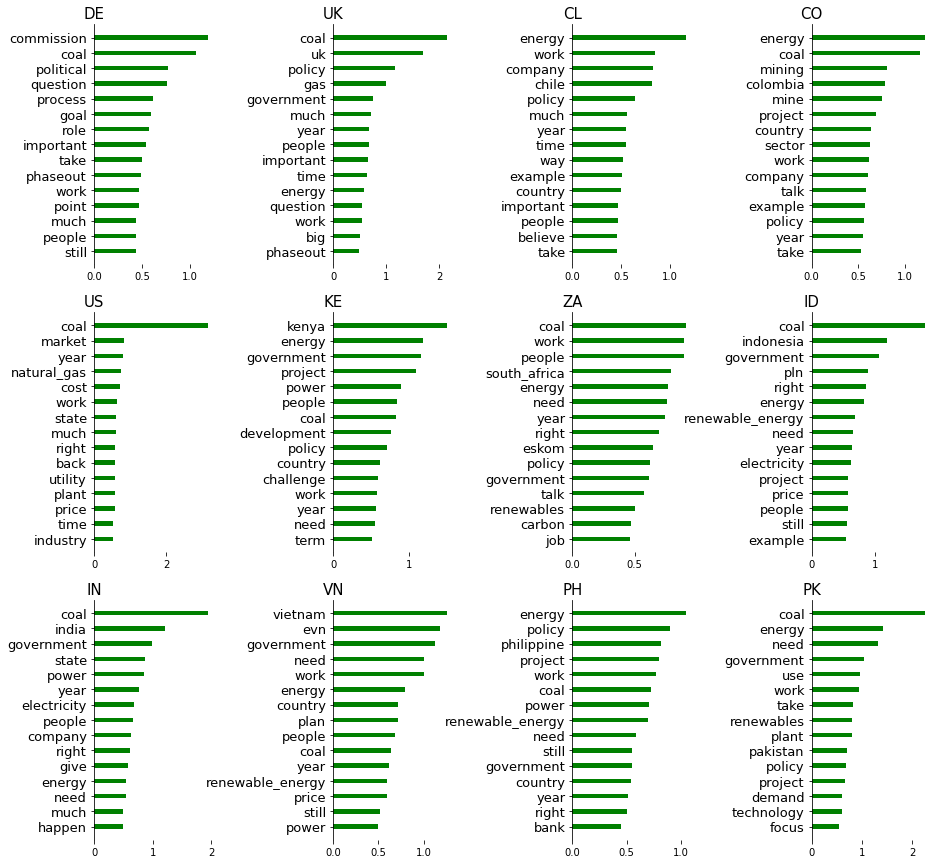

In [110]:
fig, ax1 = plt.subplots(nrows=3, ncols=4, figsize=(15,15)) #, constrained_layout = True

n = 0
for x in [0,1,2]:
    for y in [0,1,2,3]:
        country = list_countries[n]
        list_country, var_num_words = get_list_with_all_words(country)
        df_country_short_r = get_df_wordcount(list_country)

        #plot barplot
        width = 0.3

        ax1[x][y].barh(df_country_short_r['word'], df_country_short_r['share'], width, \
                color='g')





        #set title
        ax1[x][y].set_title(country, fontsize=var_text_size, x=0, loc='center')

        #set ticks
        ax1[x][y].set_yticks(ticks= df_country_short_r.index, labels=df_country_short_r['word'], fontsize=var_text_size-2)

        n += 1

#remove spines
for ax in ax1.flat:
    for x in ['top', 'bottom', 'right']: #left
        ax.spines[x].set_visible(False) 
        
# set the spacing between subplots
plt.subplots_adjust(wspace=1, hspace=0.2) #left=0.1, bottom=0.1, right=0.9, top=0.9,

for p_s in ['png', 'svg']: 
    plt.savefig('.//results//wordclouds//top_'+str(var_keep)+'_high_frequency_words'+timestr+'_V01.'+p_s, \
                   bbox_inches="tight") # , dpi=600
#plot graph
plt.show()